# Exploratory data analysis (EDA) of supermarket data

## Libraries and settings

In [83]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched supermarket data

In [84]:
# Read and select variables
df_orig = pd.read_csv("supermarkets_data_enriched.csv")[[
    'type',
    'id',
    'lat',
    'lon',
    'brand',
    'shop',
    'addr:city',
    'addr:housenumber',
    'addr:postcode',
    'geometry',
    'index_right',
    'bfs_name',
    'bfs_number',
    'pop',
    'pop_dens',
    'frg_pct',
    'emp'
]]


# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


In [85]:
# 1 Count supermarkets per brand
df_orig['brand'].value_counts()


brand
Migros                                   335
Coop                                     174
Denner                                   142
Volg                                      68
VOI Migros Partner                        43
ALDI                                      39
Aldi                                      25
Lidl                                      25
Spar                                      19
Landi                                     15
Migros-Outlet                             11
Alnatura                                  11
VOI                                        4
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Jumbo                                      1
Rolog Krinner Cotub Titan Serac Molok      1
Name: count, dtype: int64

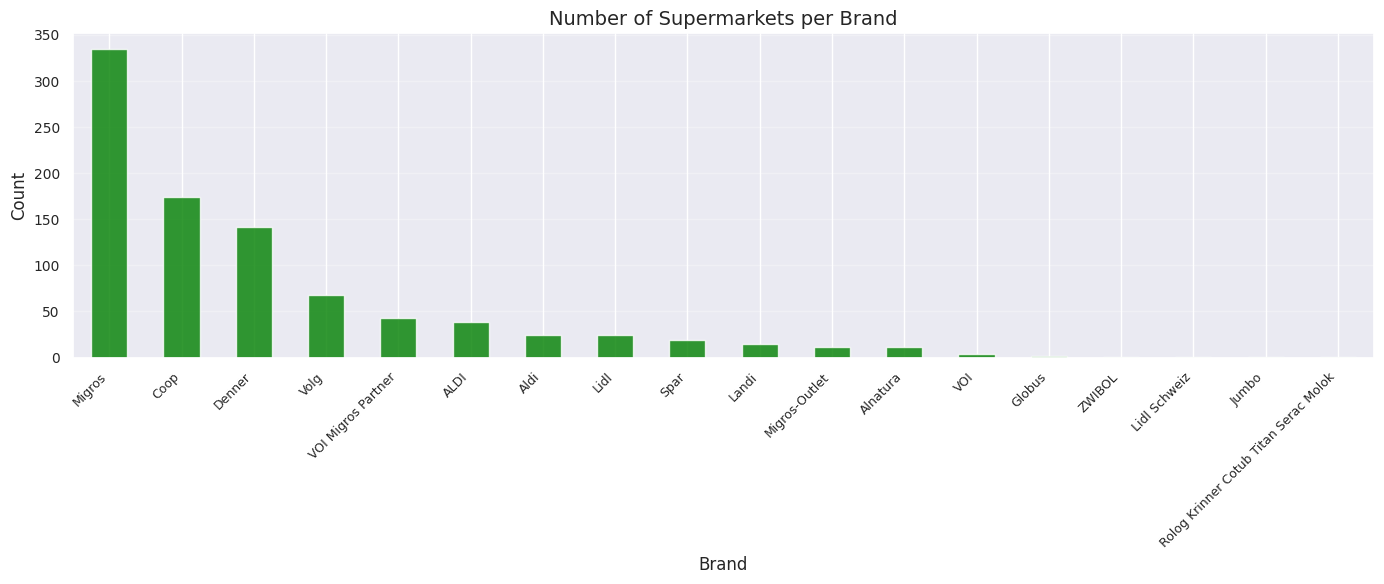

In [86]:
# 2 Create a bar chart of supermarkets per brand

brand_counts = df_orig['brand'].value_counts()


brand_counts = df_orig['brand'].value_counts()

plt.figure(figsize=(14,6))

brand_counts.plot(kind='bar', color='green', alpha=0.8)

plt.title("Number of Supermarkets per Brand", fontsize=14)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=10)

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Quantiles original values

In [87]:
df_orig[['pop', 'pop_dens', 'frg_pct', 'emp']].quantile(
    q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]
).round(2)


,pop,pop_dens,frg_pct,emp
0.05,1949.8,75.08,10.80,680.0
0.10,3170.4,136.66,13.18,1176.0
0.25,5350.0,376.59,19.48,2635.0
0.50,12861.0,995.41,25.43,7044.0
0.75,37082.0,2607.34,32.46,34703.0
0.90,420217.0,4778.99,37.96,491193.0
0.95,420217.0,4778.99,41.37,491193.0


### Shape (number of rows and colums)

In [89]:
# Number of rows and columns
print(df.shape)

(872, 17)


### Data types

In [90]:
df.dtypes

type                 object
id                    int64
lat                 float64
lon                 float64
brand                object
shop                 object
addr:city            object
addr:housenumber     object
addr:postcode       float64
geometry             object
index_right           int64
bfs_name             object
bfs_number            int64
pop                   int64
pop_dens            float64
frg_pct             float64
emp                 float64
dtype: object

## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

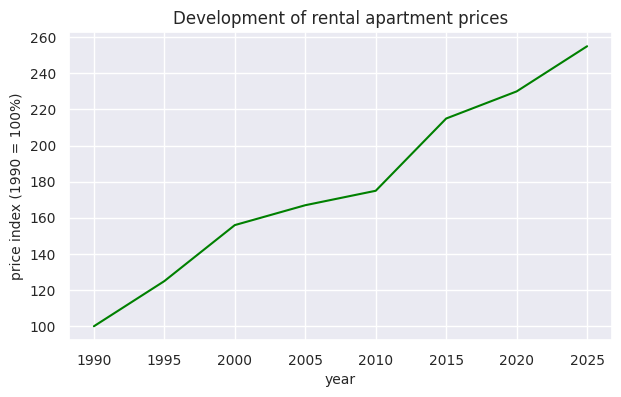

In [91]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='pop'>

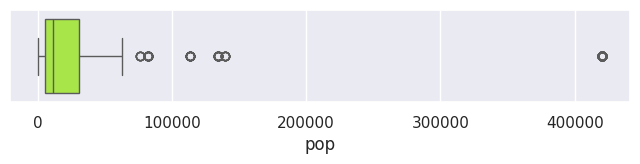

In [92]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['pop'], color="greenyellow")

### Horizontal Bar Chart

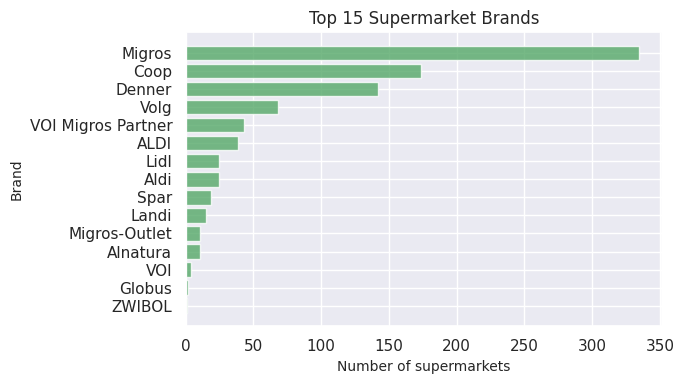

In [93]:
# Group data by brand (only the topmost 15 values are shown)
df_bar = df_orig['brand'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for bar chart
nshops = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, nshops, align='center', color='g', alpha=0.8)

ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of supermarkets', fontsize=10)
ax.set_ylabel('Brand', fontsize=10)
ax.set_title('Top 15 Supermarket Brands')

# Show graph
plt.tight_layout()
plt.show()


### Piechart (matplotlib)

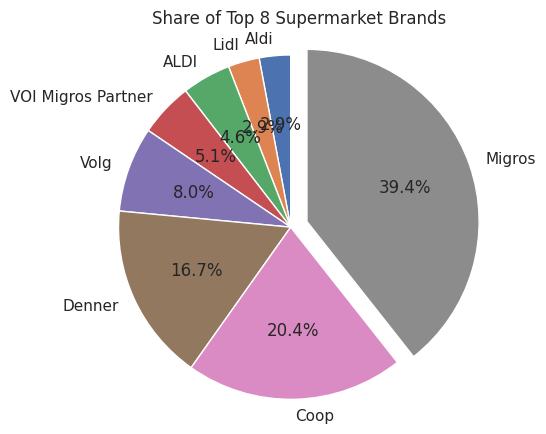

In [94]:
# Group by brand (top 8 most frequent brands)
df_bar = df_orig['brand'].value_counts().nlargest(8).sort_values(ascending=True)

# Prepare sizes and labels
sizes = list(df_bar.values)
labels = list(df_bar.index.values)

# Create explode tuple (last slice highlighted)
explode = [0] * (len(labels) - 1) + [0.1]

# Plot
fig1, ax1 = plt.subplots(figsize=(5,5))

ax1.pie(
    sizes,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90
)

ax1.axis('equal')  # ensures the pie is drawn as a circle

plt.title("Share of Top 8 Supermarket Brands")
plt.show()


## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

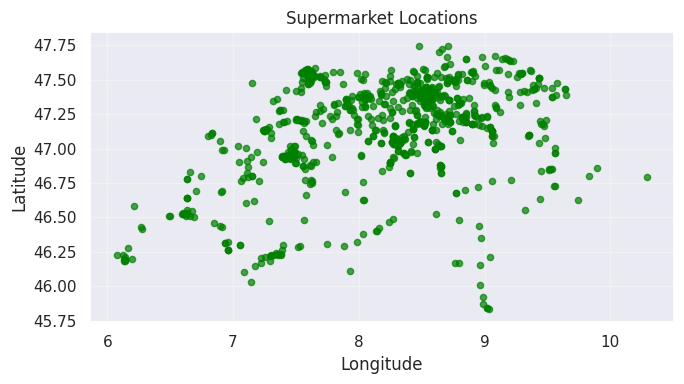

In [95]:
plt.figure(figsize=(7,4))

plt.scatter(
    df_orig['lon'],
    df_orig['lat'],
    color="green",
    alpha=0.7,
    s=20
)

plt.title('Supermarket Locations', fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Supermarket Locations by Brand (required plot)

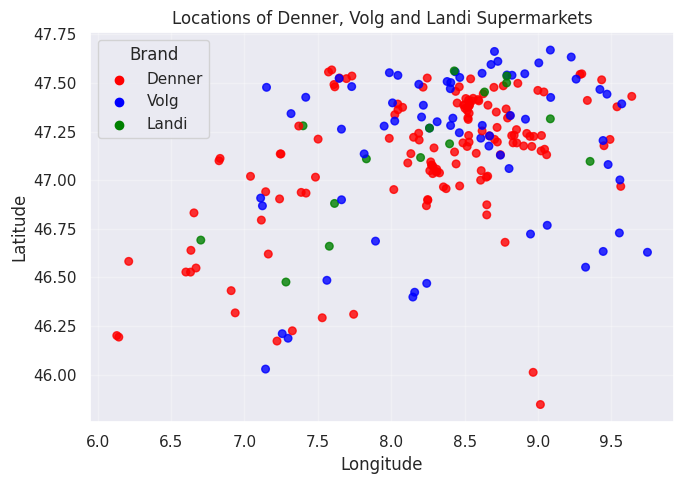

In [96]:
# Select only brands required by the task (and keep others optionally)
brands_required = ['Denner', 'Volg', 'Landi']

df_sub = df_orig.loc[df_orig['brand'].isin(brands_required)]

# Color map for required brands
colors = {
    'Denner': 'red',
    'Volg': 'blue',
    'Landi': 'green'
}

plt.figure(figsize=(7,5))

plt.scatter(
    df_sub['lon'],
    df_sub['lat'],
    c=df_sub['brand'].map(colors),
    s=30,
    alpha=0.8
)

plt.title('Locations of Denner, Volg and Landi Supermarkets', fontsize=12)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(alpha=0.3)

# Legend
for brand, color in colors.items():
    plt.scatter([], [], c=color, label=brand)

plt.legend(title="Brand", loc='upper left')

plt.tight_layout()
plt.show()


# Include all brands

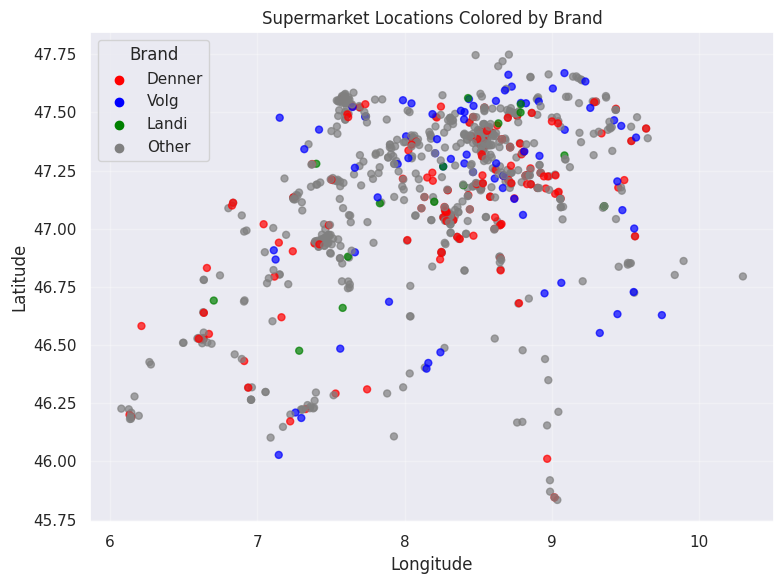

In [97]:
# Assign colors
df_orig['color'] = df_orig['brand'].map({
    'Denner': 'red',
    'Volg': 'blue',
    'Landi': 'green'
}).fillna('gray')  # all other brands = gray

plt.figure(figsize=(8,6))

plt.scatter(
    df_orig['lon'],
    df_orig['lat'],
    c=df_orig['color'],
    s=25,
    alpha=0.7
)

plt.title("Supermarket Locations Colored by Brand", fontsize=12)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)

# Build legend manually
plt.scatter([], [], c='red', label='Denner')
plt.scatter([], [], c='blue', label='Volg')
plt.scatter([], [], c='green', label='Landi')
plt.scatter([], [], c='gray', label='Other')

plt.legend(title="Brand", loc='upper left')

plt.tight_layout()
plt.show()


### Scatterplot-matrix (seaborn)

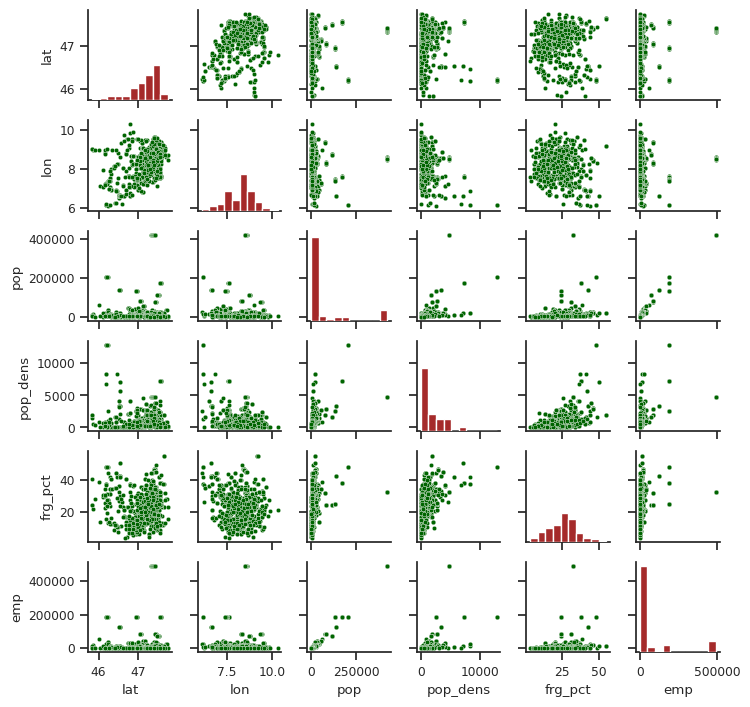

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", font_scale=0.8)

numeric_vars = ['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']

g = sns.PairGrid(
    df_orig[numeric_vars],
    height=1.2,
    aspect=1
)

g.map_upper(sns.scatterplot, color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

plt.show()


### Hexagonal binning plot  (matplotlib)

(746, 18)


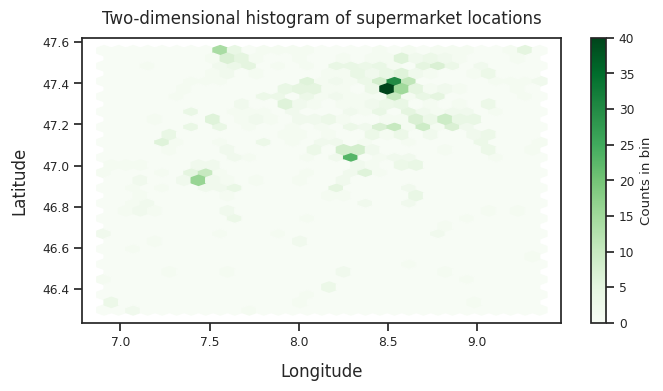

In [99]:
# Subset (optional limit to Switzerland bounding box)
df_sub = df_orig.loc[
    (df_orig['lat'] >= df_orig['lat'].quantile(0.05)) &
    (df_orig['lat'] <= df_orig['lat'].quantile(0.95)) &
    (df_orig['lon'] >= df_orig['lon'].quantile(0.05)) &
    (df_orig['lon'] <= df_orig['lon'].quantile(0.95))
]

print(df_sub.shape)

# Plot
plt.figure(figsize=(7,4))
plt.hexbin(
    df_sub['lon'],
    df_sub['lat'],
    gridsize=30,
    cmap='Greens'
)

plt.xlabel('Longitude', fontsize=12, labelpad=10)
plt.ylabel('Latitude', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of supermarket locations', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('Counts in bin')

plt.tight_layout()
plt.show()


### Correlation heatmap (seaborn)

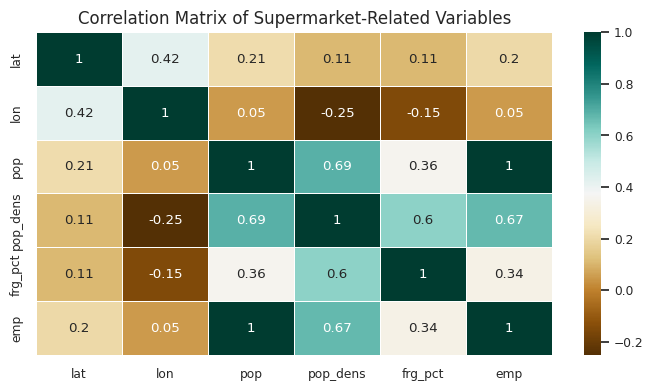

In [100]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix using numeric supermarket variables
numeric_vars = ['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']

plt.figure(figsize=(7,4))
corr = df_orig[numeric_vars].corr().round(2)

# Plot heatmap
sns.heatmap(
    corr,
    cmap="BrBG",
    annot=True,
    linewidths=0.5
)

plt.title("Correlation Matrix of Supermarket-Related Variables", fontsize=12)
plt.tight_layout()
plt.show()


### Bubble plot (seaborn)

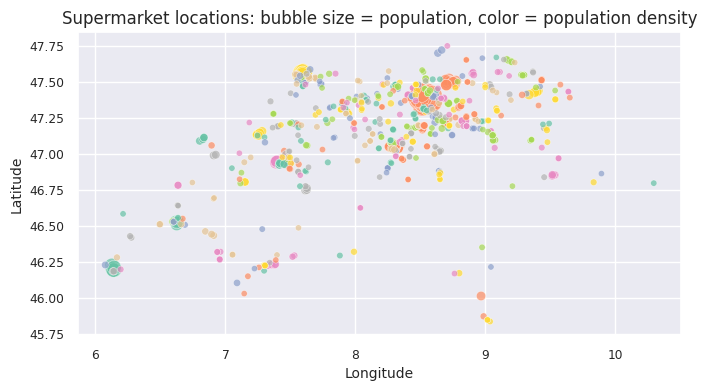

In [101]:
# Subset: optional, um extremes Rauschen zu entfernen
df_sub = df_orig.loc[
    (df_orig['pop'] >= df_orig['pop'].quantile(0.10)) &
    (df_orig['pop'] <= df_orig['pop'].quantile(0.90))
]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')

ax = sns.scatterplot(
    x="lon",
    y="lat",
    size="pop",        # Bubble size = population
    hue="pop_dens",    # Color = population density
    palette="Set2",
    sizes=(20, 200),   # control bubble scale
    alpha=0.7,
    data=df_sub
)

# Set title and axes
ax.set_title('Supermarket locations: bubble size = population, color = population density', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)

# Remove automatic legend if required (like in your example)
ax.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [102]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-30 19:28:22
Python Version: 3.11.14
-----------------------------------
